# Statistical Analysis of Speech Reception Threshold Test 
Statistical analysis was performed on a set of data from a group of subjects that were administered the Speech Reception Threshold Test in the Malay language, as part of the Development of Singapore Malay Speech Audiometery research project (by the Otolaryngology Department of the National University of Singapore). 

Statistical analysis using SciPy package was performed to determine if there were any statistiscally significant differences between speech reception threshold (SRT) and pure tone average (PTAv.) scores between subjects. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_rel, tsem, pearsonr

In [2]:
#SRT data file
srt_xl = '/Users/jannaha/Desktop/SRT_rawdata.xlsx'

#SRT dataset
srt_data = pd.read_excel(srt_xl)
srt_data.head()

,Subject ID,Test Ear PTAv,Average of .5 and 1kHz,Test List-Fam,Test List-No Fam,Test-Fam-SRT,Test-No Fam-SRT,Retest List-Fam,Retest List-No Fam,Retest-Fam-SRT,Retest-No Fam-SRT,Difference with Fam,Difference with No Fam
0,899,16.666667,15.0,1A,2A,6,10,1B,2B,7,5,10.666667,6.666667
1,774,11.666667,12.5,1B,2B,8,7,2A,1A,12,10,3.666667,4.666667
2,300,15.000000,17.5,2A,1A,6,10,2B,1B,8,9,9.000000,5.000000
3,190,25.000000,25.0,2B,1B,15,14,1A,2A,17,15,10.000000,11.000000
4,300,11.666667,12.5,1A,2A,5,11,1B,2B,2,10,6.666667,0.666667


In [3]:
srt_data_bylist1 = srt_data.loc[srt_data["Test List-Fam"].isin(['1A', '1B'])]
srt_data_bylist2 = srt_data.loc[srt_data["Test List-Fam"].isin(['2A', '2B'])]

Pearson correlation coefficient, with Familiarisation: 0.8472437812367525
p-value: 5.999570409821129e-14
Pearson correlation coefficient, without Familiarisation: 0.7458884867784054
p-value: 1.78473804820323e-09


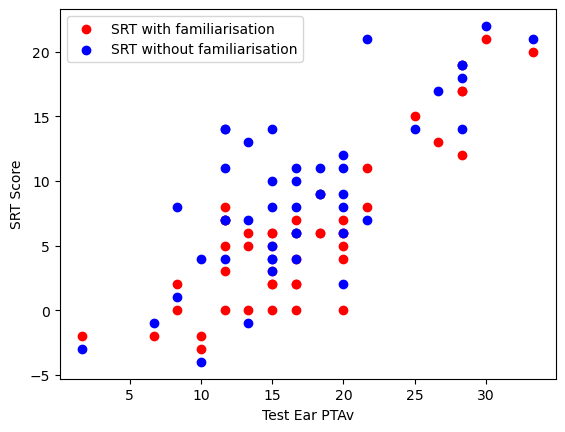

In [6]:
# Pearson correlation
x = srt_data['Test Ear PTAv'].to_numpy()
y1 = srt_data['Test-Fam-SRT'].to_numpy()
y2 = srt_data['Test-No Fam-SRT'].to_numpy()

correlation_coefficient1, p_value1 = pearsonr(x,y1)
correlation_coefficient2, p_value2 = pearsonr(x,y2)

# Print the results
print("Pearson correlation coefficient, with Familiarisation:", correlation_coefficient1)
print("p-value:", p_value1)

print("Pearson correlation coefficient, without Familiarisation:", correlation_coefficient2)
print("p-value:", p_value2)

# Create two scatterplots comparing Test ear PTA and SRT scores - with and without familiarisation conditions
plt.scatter(x, y1, color = 'red' , label = 'SRT with familiarisation')
plt.scatter(x, y2, color = 'blue', label = 'SRT without familiarisation')

plt.xlabel('Test Ear PTAv')
plt.ylabel('SRT Score')
plt.legend()

plt.show()

In [4]:
combinations_list = [('Test Ear PTAv', 'Test-Fam-SRT'), 
                     ('Test Ear PTAv', 'Test-No Fam-SRT'), 
                     ('Test-Fam-SRT', 'Test-No Fam-SRT'),
                     ('Test-Fam-SRT', 'Retest-Fam-SRT'),
                     ('Test-No Fam-SRT','Retest-No Fam-SRT')]

In [5]:
def pairedttest(var1, var2):
    # Perform the paired t-test
    ttest_fam = ttest_rel(srt_data[var1], srt_data[var2])
    
    # Calculate mean difference and SE difference
    mean_diff = srt_data[var1].mean() - srt_data[var2].mean()
    se_diff = tsem(srt_data[var1]- srt_data[var2])

    # Extract the p-value from the test result
    p_value = ttest_fam.pvalue
    stats = ttest_fam.statistic
    df = ttest_fam.df
    ci = ttest_fam.confidence_interval(confidence_level=0.95)
    
    # Return a dictionary containing the results
    return {
        'Variable 1': var1,
        'Variable 2': var2,
        'Statistic': stats,
        'df': df,
        'p-value': p_value,
        'Mean Difference': mean_diff,
        'SE Difference': se_diff,
        'Confidence Interval': ci 
    }

In [6]:
results_list = [pairedttest(var1, var2) for var1, var2 in combinations_list]
results_df = pd.DataFrame(results_list)

In [7]:
results_df.head()

,Variable 1,Variable 2,Statistic,df,p-value,Mean Difference,SE Difference,Confidence Interval
0,Test Ear PTAv,Test-Fam-SRT,21.586191,46,1.043965e-25,11.184397,0.518127,"(10.141460789671285, 12.227333536569848)"
1,Test Ear PTAv,Test-No Fam-SRT,12.093380,46,6.907105e-16,8.163121,0.675007,"(6.804401218352492, 9.52183991639928)"
2,Test-Fam-SRT,Test-No Fam-SRT,-6.239122,46,1.267339e-07,-3.021277,0.484247,"(-3.9960154355283404, -2.0465377559610216)"
3,Test-Fam-SRT,Retest-Fam-SRT,0.159370,46,8.740751e-01,0.063830,0.400513,"(-0.7423618298014855, 0.8700214042695705)"
4,Test-No Fam-SRT,Retest-No Fam-SRT,2.822515,46,7.015753e-03,1.425532,0.505057,"(0.408904131515339, 2.4421596982718947)"


In [17]:
# Export Results DataFrame to Excel
results_df.to_excel('/Users/jannaha/Desktop/SRT_statsresults.xlsx', index=False)